<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/Arma_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dicky Fuller test:- if p <0.05 the null hypothesis is false and the data is stationary<br> if p>0.05 the null hypothesis is true and the  data is not stationary


In [ ]:
%pip install numpy
%pip install pandas
%pip install statsmodels
%pip install matplotlib

In [2]:
import numpy as np
import pandas as pd

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
pip install pmdarima

In [ ]:
pip show pmdarima

In [97]:


from pmdarima.arima import auto_arima

In [10]:

df1 = pd.read_csv('UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1= df1[:120]

In [11]:
df2 = pd.read_csv('UDEMY_TSA_FINAL/Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

## ARMA

<AxesSubplot:xlabel='Date'>

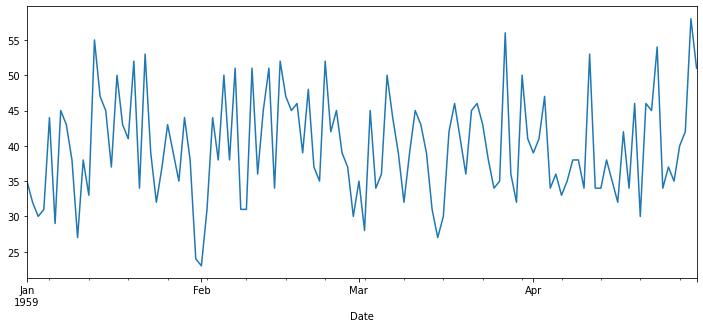

In [14]:
df1['Births'].plot(figsize=(12,5))


In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [98]:
auto_arima(df1['Births'],seasonal=False,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.745 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Wed, 09 Feb 2022   AIC                            823.489
Time:                        06:54:53   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pip show pmdarima

Name: pmdarima
Version: 1.8.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages
Requires: setuptools, scikit-learn, pandas, joblib, Cython, numpy, scipy, urllib3, statsmodels
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [19]:
train = df1.iloc[:90]
test = df1.iloc[90:]


In [20]:
from statsmodels.tsa.arima_process import ArmaProcess


In [21]:
model = ArmaProcess(train['Births'],ma=(2,2)).generate_sample(nsample=10000)

In [22]:
import matplotlib.pyplot as plt

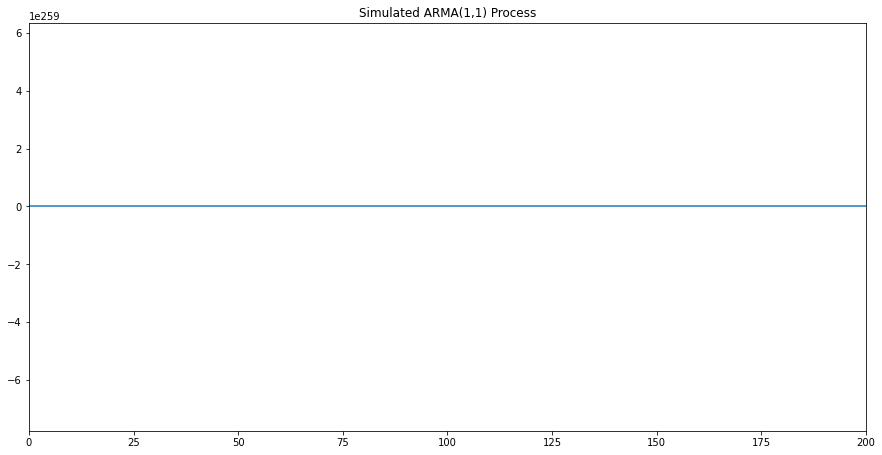

In [23]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(model)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

In [24]:
model

array([ 7.03258423e-004, -1.92792107e-002, -2.49991091e-002, ...,
       -3.79324507e+259,  5.68938133e+259, -7.10205531e+259])

In [25]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
model = ARIMA(train['Births'],order=(2,0,2))

In [27]:
results = model.fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Wed, 09 Feb 2022   AIC                            627.625
Time:                        05:55:25   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7571      1.017     39.090      0.000      37.764      41.750
ar.L1         -0.4664      1.004     -0.465      0.642      -2.434       1.501
ar.L2          0.5076      0.941      0.540      0.589      -1.336       2.352
ma.L1          0.5625     12.841      0.044      0.965     -24.605      25.730
ma.L2         -0.4374      5.527     -0.079      0.937     -11.269      10.395
sigma2        54.3787    681.165      0.080      0.936   -1280.679    1389.437
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start= len(train)
end = len(train)+ len(test)-1

In [30]:
predictions = results.predict(start,end).rename('ARMA (2,0,2) Predictions')

In [31]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [32]:
predictions

1959-04-01    40.533904
1959-04-02    39.549875
1959-04-03    40.248072
1959-04-04    39.422879
1959-04-05    40.162206
1959-04-06    39.398460
1959-04-07    40.130005
1959-04-08    39.401084
1959-04-09    40.112436
1959-04-10    39.410610
1959-04-11    40.099073
1959-04-12    39.421679
1959-04-13    40.087127
1959-04-14    39.432870
1959-04-15    40.075843
1959-04-16    39.443814
1959-04-17    40.065010
1959-04-18    39.454423
1959-04-19    40.054563
1959-04-20    39.464681
1959-04-21    40.044474
1959-04-22    39.474594
1959-04-23    40.034729
1959-04-24    39.484171
1959-04-25    40.025315
1959-04-26    39.493425
1959-04-27    40.016220
1959-04-28    39.502364
1959-04-29    40.007434
1959-04-30    39.511000
Freq: D, Name: ARMA (2,0,2) Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

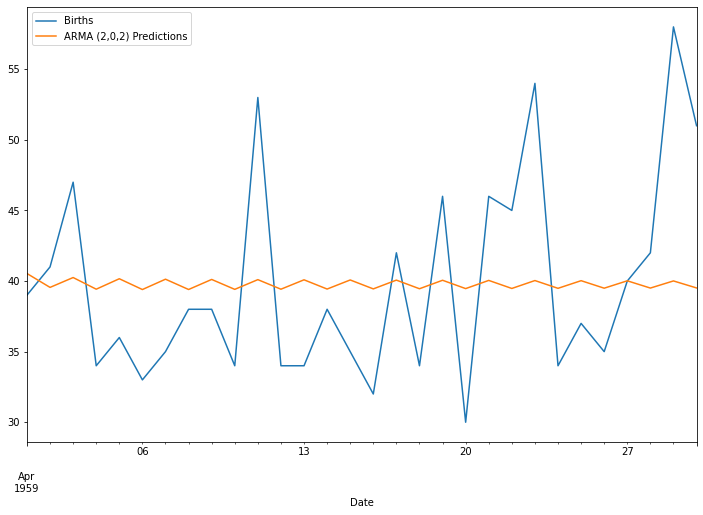

In [33]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)

In [34]:
test.mean()

Births    39.833333
dtype: float64

In [35]:
predictions.mean()

39.78541134908797

<AxesSubplot:xlabel='Date'>

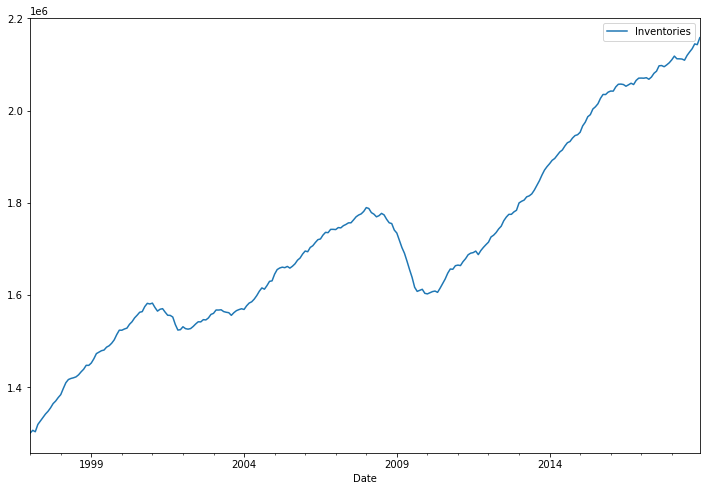

In [37]:
df2.plot(figsize=(12,8))

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'


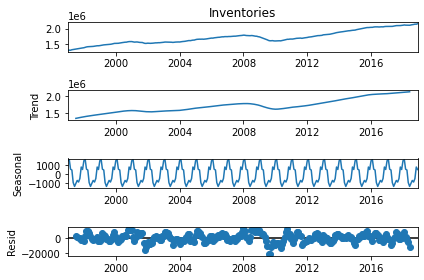

In [45]:
results = seasonal_decompose(df2['Inventories'],model='add')
results.plot();

In [135]:
pip install pyramid-arima


     |████████████████████████████████| 515 kB 7.6 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /home/gitpod/.pyenv/versions/3.8.12/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-i7ru1vct/pyramid-arima_c1cd5a6c3bb84f04a99762a9cffb186a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-i7ru1vct/pyramid-arima_c1cd5a6c3bb84f04a99762a9cffb186a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-5omrec_g
       cwd: /tmp/pip-install-i7ru1vct/pyramid-arima_c1cd5a6c3bb84f04a99762a9cffb186a/
  Complete output (559 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cython>=0.23', 'numpy>=1.10', 'scipy>=0.9', 'scikit-learn>=0.17', 'pandas>=0.19'

In [139]:
from pmdarima.arima import auto_arima


In [141]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 09 Feb 2022   AIC                           5348.037
Time:                        07:31:50   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
from statsmodels.tsa.statespace.tools import diff

In [50]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [52]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


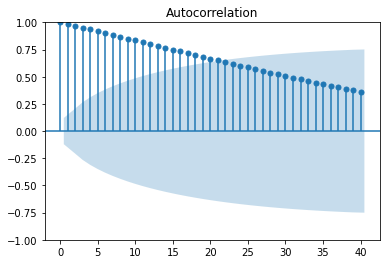

In [54]:
plot_acf(df2['Inventories'],lags=40);

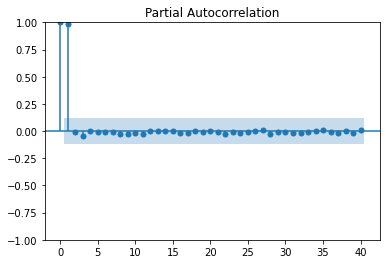

In [55]:
plot_pacf(df2['Inventories'],lags=40);


### Sharp cutoff in PACF give the value of AR

In [56]:
# AR=1
# I=1
# M=0

In [65]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.285 seconds


In [66]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 09 Feb 2022   AIC                           5348.037
Time:                        06:29:29   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
train=df2.iloc[:252]
test = df2.iloc[252:]


In [68]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results=model.fit()
results.summary()

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2555.151
Date:                Wed, 09 Feb 2022   AIC                           5116.303
Time:                        06:34:28   BIC                           5126.879
Sample:                    01-01-1997   HQIC                          5120.559
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    768.959      0.000       0.997       1.003
ma.L1         -0.9999      0.033    -30.523      0.000      -1.064      -0.936
sigma2      2.997e+07   2.15e-10   1.39e+17      0.000       3e+07       3e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):                99.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -1.17
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+32. Standard errors may be unstable.
"""

In [69]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA p

In [71]:
start = len(train)
end = len(train)+ len(test)-1

In [72]:
predictions= results.predict(start=start,end=end,typ='levels').rename('ARIMA(1,1,1) preds')

In [73]:
predictions

2018-01-01    2.106932e+06
2018-02-01    2.110112e+06
2018-03-01    2.113293e+06
2018-04-01    2.116474e+06
2018-05-01    2.119654e+06
2018-06-01    2.122835e+06
2018-07-01    2.126016e+06
2018-08-01    2.129196e+06
2018-09-01    2.132377e+06
2018-10-01    2.135558e+06
2018-11-01    2.138738e+06
2018-12-01    2.141919e+06
Freq: MS, Name: ARIMA(1,1,1) preds, dtype: float64

In [74]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


In [108]:
s_model = SARIMAX(train['Inventories'],order=(0,1,0))
s_results=s_model.fit()
s_results.summary()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<AxesSubplot:xlabel='Date'>

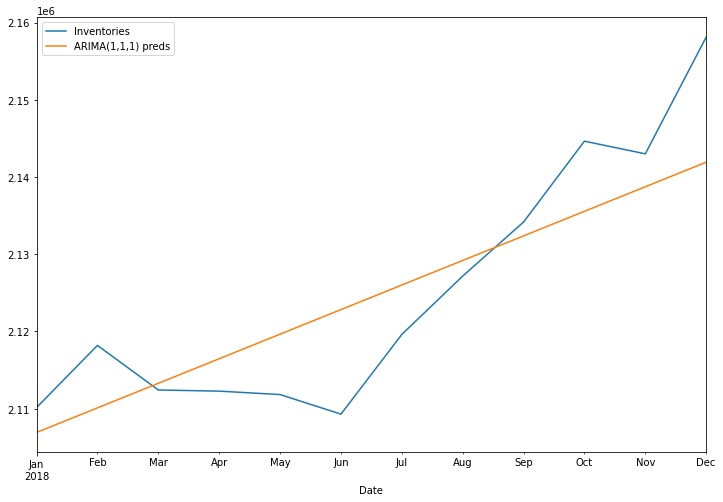

In [77]:
test['Inventories'].plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)

In [88]:
s_predictions= s_results.predict(start=start,end=end,typ='levels').rename('SARIMAX(1,1,1) preds')

<AxesSubplot:xlabel='Date'>

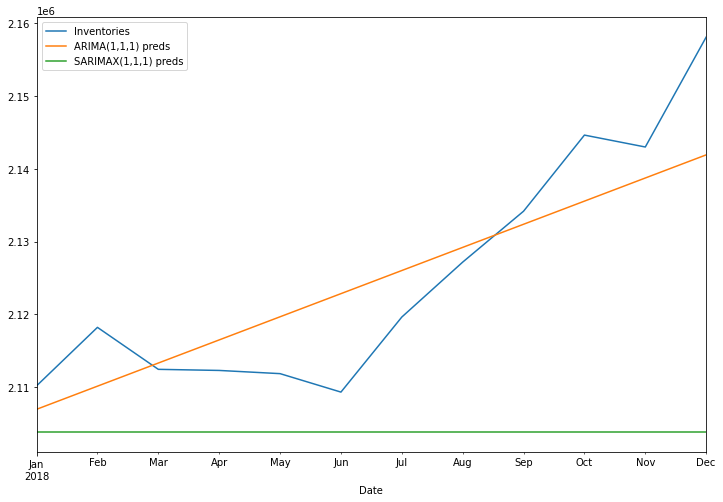

In [89]:
test['Inventories'].plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)
s_predictions.plot(figsize=(12,8),legend=True)

In [91]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2555.151
Date:                Wed, 09 Feb 2022   AIC                           5116.303
Time:                        06:45:25   BIC                           5126.879
Sample:                    01-01-1997   HQIC                          5120.559
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    768.959      0.000       0.997       1.003
ma.L1         -0.9999      0.033    -30.523      0.000      -1.064      -0.936
sigma2      2.997e+07   2.15e-10   1.39e+17      0.000       3e+07       3e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):                99.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -1.17
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+32. Standard errors may be unstable.
"""

s_results.summary()

In [92]:
s_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2579.217
Date:                Wed, 09 Feb 2022   AIC                           5160.434
Time:                        06:45:44   BIC                           5163.959
Sample:                    01-01-1997   HQIC                          5161.852
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.911e+07   4.75e+06     10.330      0.000    3.98e+07    5.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               105.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [109]:
## prediction future


model = ARIMA(df2['Inventories'],order=(1,1,1,))

In [110]:
results= model.fit()

In [111]:
fcast=results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA (1,1,1) Forecast')

<AxesSubplot:xlabel='Date'>

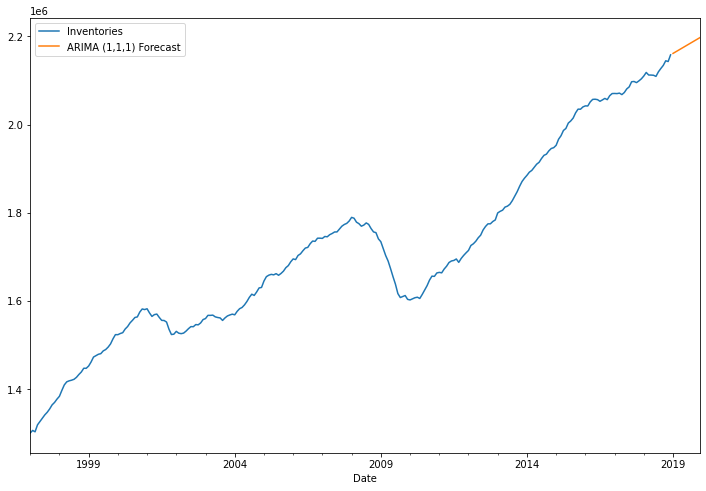

In [112]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
fcast.plot(figsize=(12,8),legend=True)

In [115]:
from pmdarima.arima import AutoARIMA


In [121]:
bruh = AutoARIMA(df2['Inventories'],seasonal =False,trace=True)

In [120]:
bruh.summary()

AttributeError: 'AutoARIMA' object has no attribute 'model_'